In [1]:
import numpy as np
import configparser

In [2]:
config = configparser.ConfigParser()
config.read('../config/config-spyder.ini')

['../config/config-spyder.ini']

In [3]:
import sys
sys.path.insert(0, '../source/')
from Get_Train_Test_Data import GetTrainTestData
from CNN_Model import CNNModel
from Aux_Functions import confusionMatrix

Using TensorFlow backend.


In [4]:
X_train, X_test, X_val, y_train, y_test, y_val = GetTrainTestData(config).read_dataset()
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')

In [5]:
model = CNNModel()

In [6]:
model.loadModel('../results/best-model/model.json')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 1249, 32)     3904      
_________________________________________________________________
activation_1 (Activation)    (None, 128, 1249, 32)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 624, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 624, 128)      495744    
_________________________________________________________________
activation_2 (Activation)    (None, 64, 624, 128)      0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [7]:
model.loadWeights('/Users/josetorronteras/Code/Music-Genre-Classification/results/best-model/weights.hdf5')

In [8]:
y_pred = model.predictModel(X_test)

Predecido:  [2 2 4 0 6 1 0 7 2 1 8 8 0 9 1 4 7 2 0 3 0 2 6 2 5 5 2 5 2 0 2 8 8 4 2 7 0
 1 7 4 1 5 0 4 2 0 0 1 1 0 8 8 6 3 1 1 6 3 6 8 9 1 0 6 6 0 0 8 3 8 0 8 2 5
 6 8 6 6 4 7 8 3 0 0 3 7 0 9 5 0 1 5 0 4 1 4 5 4 1 2 0 9 9 7 1 7 7 7 0 2 3
 8 7 1 8 8 4 3 1 3 6 9 0 2 5]


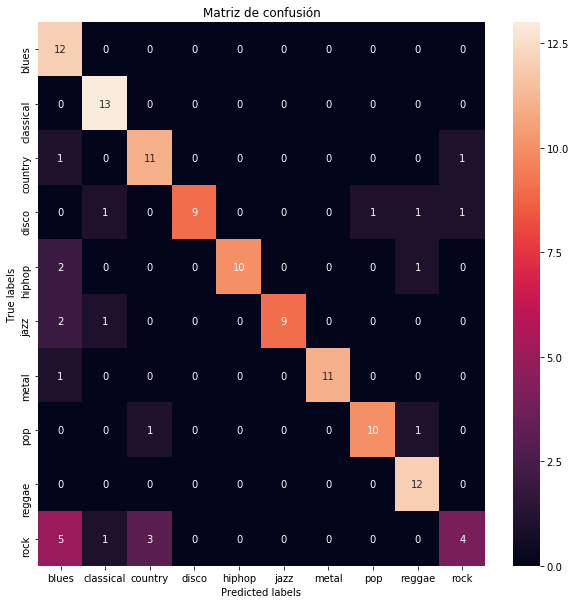

In [9]:
confusionMatrix(y_test, y_pred)